In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
#import pycmf
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
    rating = pd.read_csv('tables/ratings.csv')
    movie = pd.read_csv('tables/movies.csv')
    #df = pd.merge(rating, movie, on='movieId')
    return rating, movie


In [3]:
rating, movie= load_data()


In [4]:
sub_train, sub_eval= train_test_split(rating, train_size=0.9, stratify= rating["userId"])

In [5]:
#! pip install git+https://github.com/gbolmier/funk-svd

In [6]:
from funk_svd import SVD



In [7]:
train_df= sub_train.copy()[['userId','movieId', 'rating']]
train_df.columns = ["u_id", "i_id", "rating"]
eval_df= sub_eval.copy()[['userId','movieId', 'rating']]
eval_df.columns = ["u_id", "i_id", "rating"]

In [ ]:
rmse_values=[]
k_values = range(1, 500, 10)
for k in k_values:
    #print(k)
    iters=10
    predict= None
    for v in range(iters):

        train_df= sub_train.copy()[['userId','movieId', 'rating']]
        train_df.columns = ["u_id", "i_id", "rating"]
        eval_df= sub_eval.copy()[['userId','movieId', 'rating']]
        eval_df.columns = ["u_id", "i_id", "rating"]
        
        svd = SVD(lr=0.001, reg=0.005, n_epochs=100, n_factors=k,
            early_stopping=True, shuffle=False, min_rating=1, max_rating=5)

        svd.fit(X=train_df)
        if(predict is None):
            predict= np.array(svd.predict(eval_df))
        else:
            predict=predict+ np.array(svd.predict(eval_df))
    predict=predict/iters
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(predict, eval_df['rating']))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

In [14]:
def moving_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        start = max(0, i - window_size + 1)
        end = i + 1
        window = data[start:end]
        smoothed_data.append(sum(window) / len(window))
    return smoothed_data

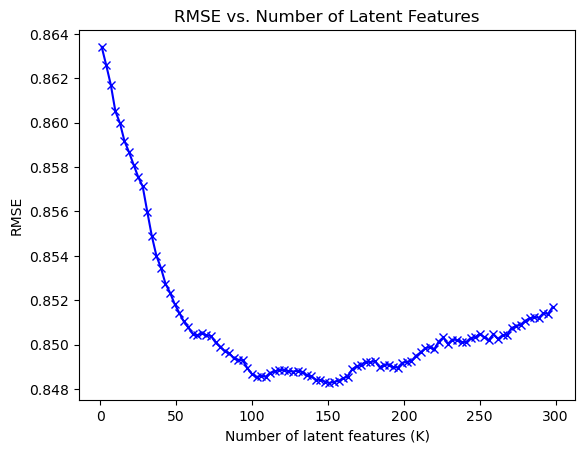

In [15]:
plt.plot(k_values, moving_average(rmse_values, 10), 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()